# Extract patches

Import necessary libraries

In [3]:
import os
import cv2
import numpy as np
from PIL import Image
import tifffile as tiff
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [9, 5]

Read image example

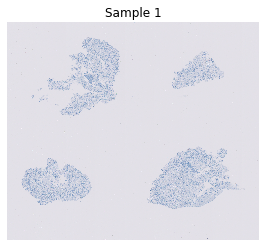

In [4]:
# Read sample 1 in order to show as an example
sample1 = cv2.imread('/fhome/gia01/vl_project2/sample_images/patch1_image1.png')

# Show image
plt.imshow(sample1, cmap='gray')
plt.title('Sample 1')
plt.axis('off')
plt.show()

**Image preprocessing**

Pass to HSV color space image example

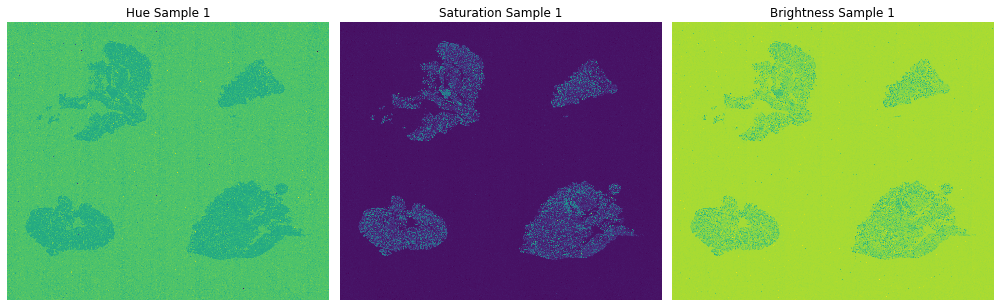

In [5]:
# Convert from RGB to BGR
bgr_img = cv2.cvtColor(sample1, cv2.COLOR_RGB2BGR)

# Convert from BGR to HSV
hsv_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2HSV)

# Extract Hue, Saturation, Value channels
h_channel, s_channel, v_channel = hsv_img[:, :, 0], hsv_img[:, :, 1], hsv_img[:, :, 2]

# Create a figure for displaying channels
plt.figure(figsize=(14, 7)) 

# Show Hue channel
plt.subplot(1, 3, 1) 
plt.imshow(h_channel)
plt.title('Hue Sample 1')
plt.axis('off')

# Show Saturation channel
plt.subplot(1, 3, 2)
plt.imshow(s_channel)
plt.title('Saturation Sample 1')
plt.axis('off')

# Show Brightness channel
plt.subplot(1, 3, 3)
plt.imshow(v_channel)
plt.title('Brightness Sample 1')
plt.axis('off')

# Adjust layout and display figure
plt.tight_layout()
plt.show()


Perform the same for every sample

In [6]:
# Define the directory containing the sample images
sample_dir = "/fhome/gia01/vl_project2/sample_images"

# List of original images
images = [os.path.join(sample_dir, file) for file in os.listdir(sample_dir) if file.endswith((".png", ".jpg", ".jpeg"))]

# Initialize an empty list to store the saturation values
saturation_values = []

# Loop through each image in the directory
for filename in os.listdir(sample_dir):
    # Load the image
    img = cv2.imread(os.path.join(sample_dir, filename))

    # Convert from RGB to BGR
    bgr_img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

    # Convert from BGR to HSV
    hsv_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2HSV)

    # Extract Saturation channel
    s = cv2.split(hsv_img)[1]

    # Add the saturation values to the list
    saturation_values.append(s)

print(len(saturation_values))


9


Binarization of the image example

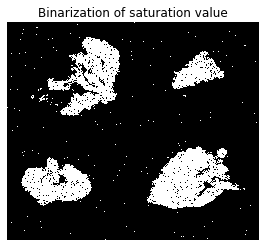

In [7]:
# Apply binary thresholding on Saturation channel
_, binary_image = cv2.threshold(s_channel, 10, 100, cv2.THRESH_BINARY)

# Display the binary image
plt.imshow(binary_image, cmap='gray')
plt.title('Binarization of saturation value')
plt.axis('off')
plt.show()

Openning and closing to remove noise on example image

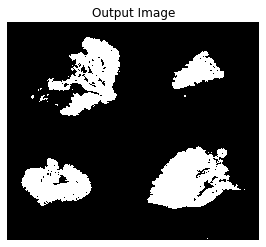

In [8]:
# Create a 3x3 cross-shaped kernel
kernel1 = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))
# Apply morphological opening to remove noise
opening = cv2.morphologyEx(binary_image, cv2.MORPH_OPEN, kernel1)

# Create a 10x10 cross-shaped kernel
kernel2 = cv2.getStructuringElement(cv2.MORPH_CROSS,(10,10))
# Apply morphological closing to fill gaps
opening = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel2)

# Display the processed image
plt.imshow(opening, cmap='gray')
plt.title('Output Image')
plt.axis('off')
plt.show()

Perform the same for every sample

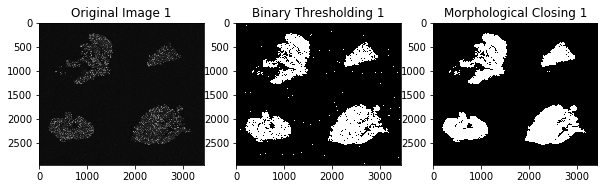

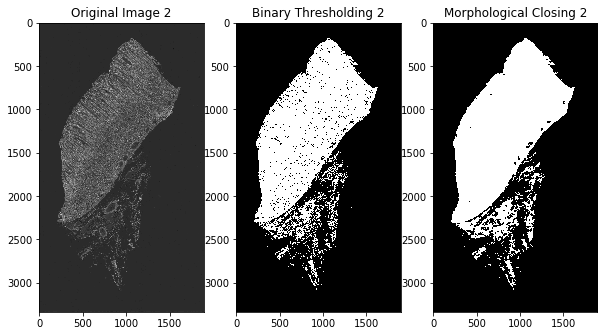

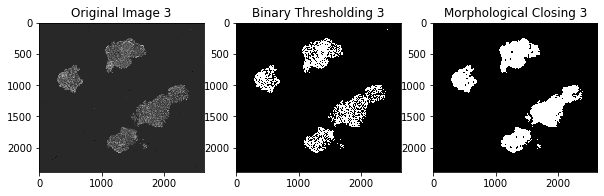

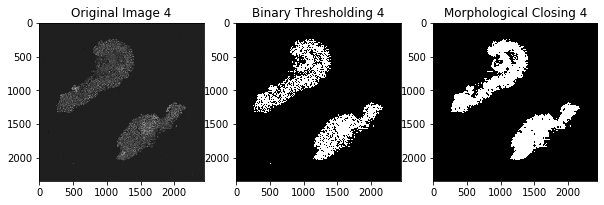

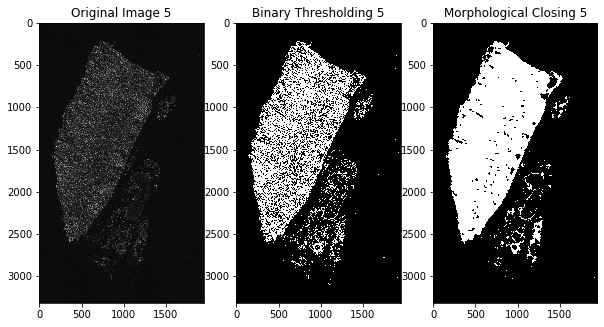

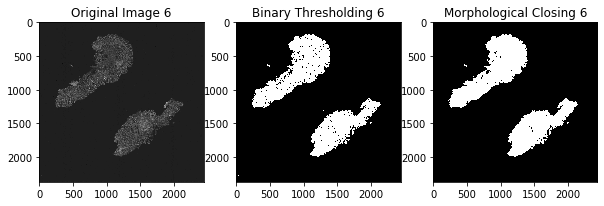

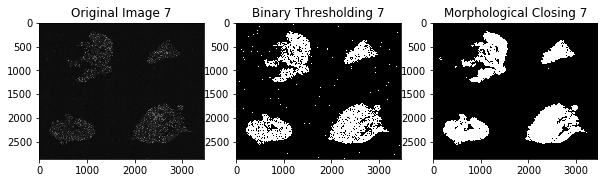

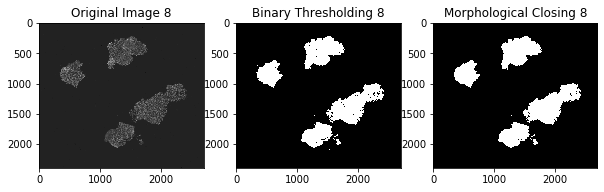

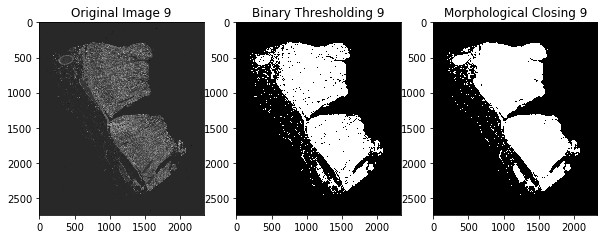

In [9]:
# Initialize a list where all the processed images will be stored
processed_images = list()

"""
SAMPLE 1
"""

# Apply binary thresholding on Saturation channel
_, binary_image1 = cv2.threshold(saturation_values[0], 10, 100, cv2.THRESH_BINARY)

# Create a 3x3 cross-shaped kernel
kernel1 = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))
# Apply morphological opening to remove noise
opening1 = cv2.morphologyEx(binary_image1, cv2.MORPH_OPEN, kernel1)

# Create a 10x10 cross-shaped kernel
kernel2 = cv2.getStructuringElement(cv2.MORPH_CROSS,(10,10))
# Apply morphological closing to fill gaps
closing1 = cv2.morphologyEx(opening1, cv2.MORPH_CLOSE, kernel2)

# Visualize the results
fig, axs = plt.subplots(1, 3, figsize=(10, 10))
axs[0].imshow(saturation_values[0], cmap="gray")
axs[0].set_title("Original Image 1")
axs[1].imshow(binary_image1, cmap="gray")
axs[1].set_title("Binary Thresholding 1")
axs[2].imshow(closing1, cmap="gray")
axs[2].set_title("Morphological Closing 1")
plt.show()

# Append last processed image to the list
processed_images.append(closing1)

"""
SAMPLE 2
"""

# Apply binary thresholding on Saturation channel
_, binary_image2 = cv2.threshold(saturation_values[1], 25, 100, cv2.THRESH_BINARY)

# Create a 3x3 cross-shaped kernel
kernel1 = cv2.getStructuringElement(cv2.MORPH_CROSS,(5,5))
# Apply morphological opening to remove noise
opening2 = cv2.morphologyEx(binary_image2, cv2.MORPH_OPEN, kernel1)

# Create a 10x10 cross-shaped kernel
kernel2 = cv2.getStructuringElement(cv2.MORPH_CROSS,(15,15))
# Apply morphological closing to fill gaps
closing2 = cv2.morphologyEx(opening2, cv2.MORPH_CLOSE, kernel2)

# Visualize the results
fig, axs = plt.subplots(1, 3, figsize=(10, 10))
axs[0].imshow(saturation_values[1], cmap="gray")
axs[0].set_title("Original Image 2")
axs[1].imshow(binary_image2, cmap="gray")
axs[1].set_title("Binary Thresholding 2")
axs[2].imshow(closing2, cmap="gray")
axs[2].set_title("Morphological Closing 2")
plt.show()

# Append last processed image to the list
processed_images.append(closing2)


"""
SAMPLE 3
"""

# Apply binary thresholding on Saturation channel
_, binary_image3 = cv2.threshold(saturation_values[2], 35, 100, cv2.THRESH_BINARY)

# Create a 3x3 cross-shaped kernel
kernel1 = cv2.getStructuringElement(cv2.MORPH_CROSS,(5,5))
# Apply morphological opening to remove noise
opening3 = cv2.morphologyEx(binary_image3, cv2.MORPH_OPEN, kernel1)

# Create a 10x10 cross-shaped kernel
kernel2 = cv2.getStructuringElement(cv2.MORPH_CROSS,(25,25))
# Apply morphological closing to fill gaps
closing3 = cv2.morphologyEx(opening3, cv2.MORPH_CLOSE, kernel2)

# Visualize the results
fig, axs = plt.subplots(1, 3, figsize=(10, 10))
axs[0].imshow(saturation_values[2], cmap="gray")
axs[0].set_title("Original Image 3")
axs[1].imshow(binary_image3, cmap="gray")
axs[1].set_title("Binary Thresholding 3")
axs[2].imshow(closing3, cmap="gray")
axs[2].set_title("Morphological Closing 3")
plt.show()

# Append last processed image to the list
processed_images.append(closing3)

"""
SAMPLE 4
"""

# Apply binary thresholding on Saturation channel
_, binary_image4 = cv2.threshold(saturation_values[3], 35, 100, cv2.THRESH_BINARY)

# Create a 3x3 cross-shaped kernel
kernel1 = cv2.getStructuringElement(cv2.MORPH_CROSS,(7,7))
# Apply morphological opening to remove noise
opening4 = cv2.morphologyEx(binary_image4, cv2.MORPH_OPEN, kernel1)

# Create a 10x10 cross-shaped kernel
kernel2 = cv2.getStructuringElement(cv2.MORPH_CROSS,(20,20))
# Apply morphological closing to fill gaps
closing4 = cv2.morphologyEx(opening4, cv2.MORPH_CLOSE, kernel2)

# Visualize the results
fig, axs = plt.subplots(1, 3, figsize=(10, 10))
axs[0].imshow(saturation_values[3], cmap="gray")
axs[0].set_title("Original Image 4")
axs[1].imshow(binary_image4, cmap="gray")
axs[1].set_title("Binary Thresholding 4")
axs[2].imshow(closing4, cmap="gray")
axs[2].set_title("Morphological Closing 4")
plt.show()

# Append last processed image to the list
processed_images.append(closing4)

"""
SAMPLE 5
"""

# Apply binary thresholding on Saturation channel
_, binary_image5 = cv2.threshold(saturation_values[4], 18, 100, cv2.THRESH_BINARY)

# Create a 3x3 cross-shaped kernel
kernel1 = cv2.getStructuringElement(cv2.MORPH_CROSS,(5,5))
# Apply morphological opening to remove noise
opening5 = cv2.morphologyEx(binary_image5, cv2.MORPH_OPEN, kernel1)

# Create a 10x10 cross-shaped kernel
kernel2 = cv2.getStructuringElement(cv2.MORPH_CROSS,(22,22))
# Apply morphological closing to fill gaps
closing5 = cv2.morphologyEx(opening5, cv2.MORPH_CLOSE, kernel2)

# Visualize the results
fig, axs = plt.subplots(1, 3, figsize=(10, 10))
axs[0].imshow(saturation_values[4], cmap="gray")
axs[0].set_title("Original Image 5")
axs[1].imshow(binary_image5, cmap="gray")
axs[1].set_title("Binary Thresholding 5")
axs[2].imshow(closing5, cmap="gray")
axs[2].set_title("Morphological Closing 5")
plt.show()

# Append last processed image to the list
processed_images.append(closing5)

"""
SAMPLE 6
"""

# Apply binary thresholding on Saturation channel
_, binary_image6 = cv2.threshold(saturation_values[5], 25, 100, cv2.THRESH_BINARY)

# Create a 3x3 cross-shaped kernel
kernel1 = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))
# Apply morphological opening to remove noise
opening6 = cv2.morphologyEx(binary_image6, cv2.MORPH_OPEN, kernel1)

# Create a 10x10 cross-shaped kernel
kernel2 = cv2.getStructuringElement(cv2.MORPH_CROSS,(10,10))
# Apply morphological closing to fill gaps
closing6 = cv2.morphologyEx(opening6, cv2.MORPH_CLOSE, kernel2)

# Visualize the results
fig, axs = plt.subplots(1, 3, figsize=(10, 10))
axs[0].imshow(saturation_values[5], cmap="gray")
axs[0].set_title("Original Image 6")
axs[1].imshow(binary_image6, cmap="gray")
axs[1].set_title("Binary Thresholding 6")
axs[2].imshow(closing6, cmap="gray")
axs[2].set_title("Morphological Closing 6")
plt.show()

# Append last processed image to the list
processed_images.append(closing6)

"""
SAMPLE 7
"""

# Apply binary thresholding on Saturation channel
_, binary_image7 = cv2.threshold(saturation_values[6], 10, 100, cv2.THRESH_BINARY)

# Create a 3x3 cross-shaped kernel
kernel1 = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))
# Apply morphological opening to remove noise
opening7 = cv2.morphologyEx(binary_image7, cv2.MORPH_OPEN, kernel1)

# Create a 10x10 cross-shaped kernel
kernel2 = cv2.getStructuringElement(cv2.MORPH_CROSS,(10,10))
# Apply morphological closing to fill gaps
closing7 = cv2.morphologyEx(opening7, cv2.MORPH_CLOSE, kernel2)

# Visualize the results
fig, axs = plt.subplots(1, 3, figsize=(10, 10))
axs[0].imshow(saturation_values[6], cmap="gray")
axs[0].set_title("Original Image 7")
axs[1].imshow(binary_image7, cmap="gray")
axs[1].set_title("Binary Thresholding 7")
axs[2].imshow(closing7, cmap="gray")
axs[2].set_title("Morphological Closing 7")
plt.show()

# Append last processed image to the list
processed_images.append(closing7)

"""
SAMPLE 8
"""

# Apply binary thresholding on Saturation channel
_, binary_image8 = cv2.threshold(saturation_values[7], 22, 100, cv2.THRESH_BINARY)

# Create a 3x3 cross-shaped kernel
kernel1 = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))
# Apply morphological opening to remove noise
opening8 = cv2.morphologyEx(binary_image8, cv2.MORPH_OPEN, kernel1)

# Create a 10x10 cross-shaped kernel
kernel2 = cv2.getStructuringElement(cv2.MORPH_CROSS,(10,10))
# Apply morphological closing to fill gaps
closing8 = cv2.morphologyEx(opening8, cv2.MORPH_CLOSE, kernel2)

# Visualize the results
fig, axs = plt.subplots(1, 3, figsize=(10, 10))
axs[0].imshow(saturation_values[7], cmap="gray")
axs[0].set_title("Original Image 8")
axs[1].imshow(binary_image8, cmap="gray")
axs[1].set_title("Binary Thresholding 8")
axs[2].imshow(closing8, cmap="gray")
axs[2].set_title("Morphological Closing 8")
plt.show()

# Append last processed image to the list
processed_images.append(closing8)

"""
SAMPLE 9
"""

# Apply binary thresholding on Saturation channel
_, binary_image9 = cv2.threshold(saturation_values[8], 25, 100, cv2.THRESH_BINARY)

# Create a 3x3 cross-shaped kernel
kernel1 = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))
# Apply morphological opening to remove noise
opening9 = cv2.morphologyEx(binary_image9, cv2.MORPH_OPEN, kernel1)

# Create a 10x10 cross-shaped kernel
kernel2 = cv2.getStructuringElement(cv2.MORPH_CROSS,(10,10))
# Apply morphological closing to fill gaps
closing9 = cv2.morphologyEx(opening9, cv2.MORPH_CLOSE, kernel2)

# Visualize the results
fig, axs = plt.subplots(1, 3, figsize=(10, 10))
axs[0].imshow(saturation_values[8], cmap="gray")
axs[0].set_title("Original Image 9")
axs[1].imshow(binary_image9, cmap="gray")
axs[1].set_title("Binary Thresholding 9")
axs[2].imshow(closing9, cmap="gray")
axs[2].set_title("Morphological Closing 9")
plt.show()

# Append last processed image to the list
processed_images.append(closing9)

In [10]:
len(processed_images)

9

**Edge detection**

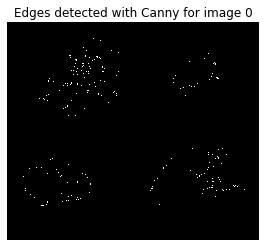

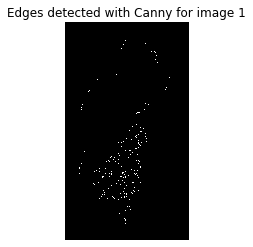

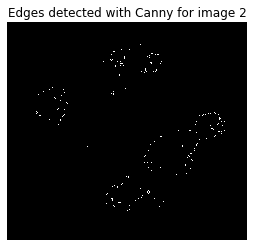

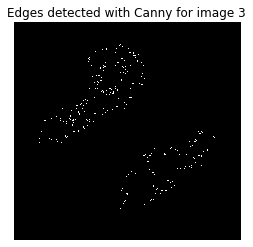

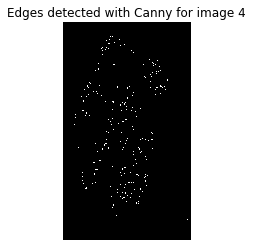

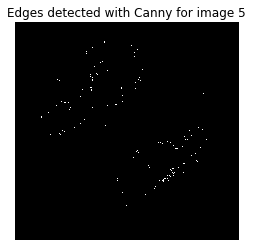

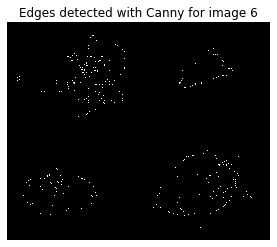

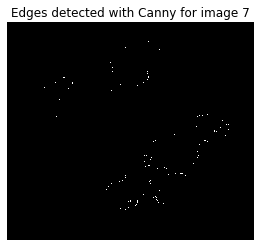

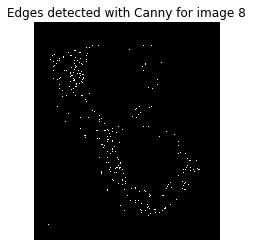

In [11]:
"""
Perform the process for all the images
"""

# Loop through each processed image
for i in range(len(processed_images)):
    # Apply Canny edge detection
    edges = cv2.Canny(processed_images[i], 1, 50)

    # Show the result
    plt.imshow(edges, cmap='gray')
    plt.title('Edges detected with Canny for image {}'.format(i))
    plt.axis('off')
    plt.show()

In [12]:
len(processed_images)

9

**Contour detection**

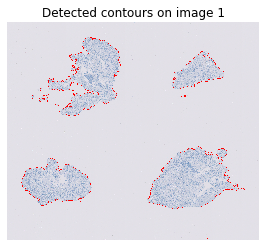

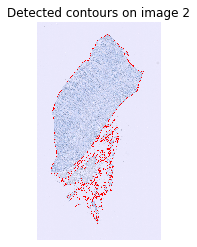

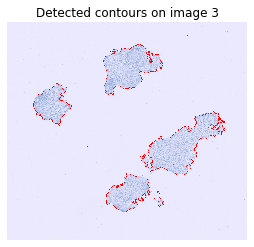

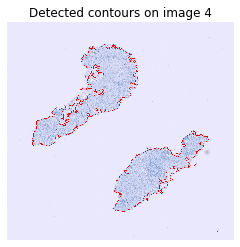

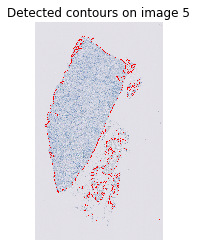

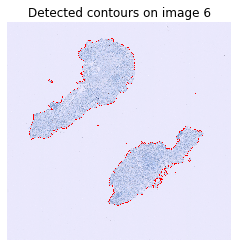

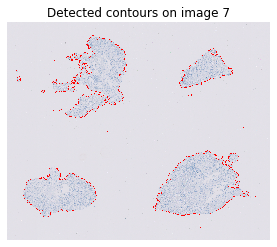

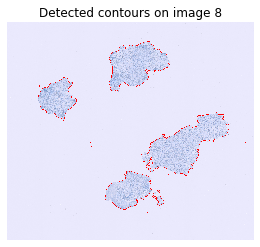

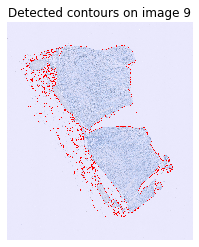

In [13]:
# Initialize empty lists for storing detected contours and coordinates for all images
all_detected_figures, all_coords = [], []

# Load the images into memory
images_files = [cv2.imread(file) for file in images]

# Loop through each processed image
for i in range(len(processed_images)):

    # Find contours in the processed image
    contours, _ = cv2.findContours(processed_images[i], cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Initialize empty lists for storing detected contours and coordinates for the current image
    detected_figures, coords = [], []

    # Loop through each contour
    for contour in contours:
        # Calculate the area of the contour
        area = cv2.contourArea(contour)
        # Filter out small contours based on area
        if area > 10:
            detected_figures.append(contour)
            # Get the bounding rectangle of the contour
            x, y, w, h = cv2.boundingRect(contour)
            coords.append((x, y, y + w, y + h))

    # Draw the contours on a copy of the original image
    output_image = cv2.drawContours(images_files[i].copy(), detected_figures, -1, (255, 0, 0), 2)

    # Display the image with detected contours
    plt.imshow(output_image, cmap='gray')
    plt.title('Detected contours on image {}'.format(i + 1))
    plt.axis('off')
    plt.show()

    # Append the detected contours and coordinates for the current image to the lists for all images
    all_detected_figures.append(detected_figures)
    all_coords.append(coords)

**Sliding window**

<class 'list'>
7504


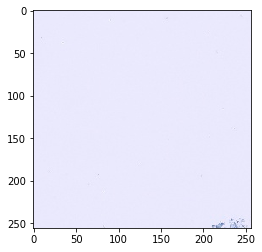

In [18]:
from turtle import width

# List of all the patches
patches = list()

def sliding_window(image, processed_image, step_size, window_size):

    """
    Function used in order to extract all the patches from an image
    """

    windows = list() # List to store the patches

    # Loop over the y-axis, moving the window down
    for y in range(0, processed_image.shape[0], step_size):

        # Loop over the x-axis, moving the window right
        for x in range(0, processed_image.shape[1], step_size):

            # Extract the current window
            width = y + window_size[1] # x- axis
            height = x + window_size[0] # y- axis
            
            w= processed_image[y:width, x:height]
            #Show the window
            #plt.imshow(window, cmap='gray')
            if (cv2.countNonZero(w) != 0): #or (cv2.countNonZero(window) == 256 * 256): Either the photo is completely black or completely white
                window = image[y:width, x:height] # Crop the patch 
                windows.append(window) # Get the patch
                plt.imshow(window, cmap='gray')
            else:
                continue
            #Show the window
            

    return windows

# Window size and step size
window_size = (256, 256)
step_size = 64



# Perform sliding window for all the sample images and save them into a directory
for i in range(9):

    # Get the patches
    windows = sliding_window(images_files[i], processed_images[i], step_size, window_size)
    # Add the detected patches to the global list
    patches += windows
    
"""""
# Create directories in order to store the extracted patches for each image
os.makedirs('extracted_patches1')
os.makedirs('extracted_patches2')
os.makedirs('extracted_patches3')
os.makedirs('extracted_patches4')
os.makedirs('extracted_patches5')
os.makedirs('extracted_patches6')
os.makedirs('extracted_patches7')
os.makedirs('extracted_patches8')
os.makedirs('extracted_patches9')
"""""

# Save the patches for each image in the corresponding directory
for i in range(len(patches)):
    # Save the patch
    cv2.imwrite('extracted_patches{}/patch{}.png'.format(i // 100 + 1, i + 1), patches[i])
        
            
print(type(patches))
print(len(patches))


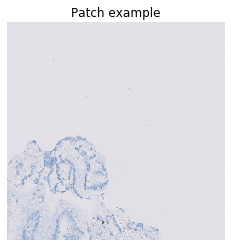

In [20]:
# Display the image with detected contours
plt.imshow(patches[100], cmap='gray')
plt.title("Patch example")
plt.axis('off')
plt.show()